In [1]:
import numpy as np

import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
claims = pd.read_csv(r'claims.csv')
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [3]:
custdemo = pd.read_csv(r'cust_demographics.csv')
custdemo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [4]:
insurance = pd.merge(left = custdemo, right=claims, how='inner',left_on='CUST_ID', right_on='customer_id')
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [5]:
insurance = insurance.drop(columns=['customer_id'])
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [7]:
## Claim date is in object type should be converted to datetime format
## claim amount should be converted to numeric and the dollar should be removed
## DOB should be converted into date time format
## contact should be converted to int

In [8]:
insurance.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [9]:
# 3.
## claim amount should be converted to numeric
insurance.Contact = pd.to_numeric(insurance.Contact.str.replace('-',''),downcast='float')
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,7.899168e+09,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,2.655431e+09,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,7.986315e+09,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,7.986315e+09,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,4.131878e+09,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,4.594254e+09,Platinum,62020796,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,5.294622e+09,Silver,63269067,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,7.126520e+09,Gold,22690595,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,4.693456e+09,Silver,12376894,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [10]:
insurance = insurance.groupby('CUST_ID').first().reset_index().drop_duplicates("CUST_ID")
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,154557,Female,23-May-78,DE,9.628791e+09,Platinum,69348631,Driver error,04/10/2018,Auto,No,Injury only,None,1.0,Yes
1,263204,Male,20-Dec-72,TX,1.738926e+09,Silver,40953049,Other causes,04/04/2018,Auto,No,Material and injury,$39192,1.0,Yes
2,287476,Male,28-Jul-88,FL,3.645981e+09,Silver,45780237,Natural causes,10/17/2017,Auto,Unknown,Material only,$1621.5,2.0,Yes
3,441097,Male,19-Aug-71,CA,1.873488e+09,Gold,89833962,Other causes,03/21/2018,Auto,Yes,Material and injury,$37040,1.0,No
4,524545,Female,10-Aug-80,NC,7.988625e+09,Gold,35782742,Other driver error,07/27/2018,Auto,No,Injury only,$35250,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,28-Jan-65,UT,5.175625e+09,Silver,4549014,Other causes,07/07/2018,Auto,No,Injury only,$21480,1.0,No
1074,99723844,Female,19-Jun-66,HI,4.577521e+09,Gold,35453672,Natural causes,01/06/2018,Auto,Yes,Material and injury,$14360,1.0,No
1075,99761663,Female,18-Nov-63,NC,6.432465e+09,Silver,37305754,Natural causes,04/04/2018,Auto,No,Material only,$1242,1.0,Yes
1076,99892000,Male,08-Jun-95,OR,3.952466e+09,Gold,22960702,Driver error,11/13/2017,Auto,No,Material only,$2415,2.0,Yes


In [11]:
insurance.claim_amount = insurance.claim_amount.str.replace('$','').astype(np.float64)
#insurance.claim_amount = insurance.claim_amount.astype(np.float64)

C:\Users\Kamakshi\AppData\Local\Temp\ipykernel_16132\926444711.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  insurance.claim_amount = insurance.claim_amount.str.replace('$','').astype(np.float64)


In [12]:
insurance.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                float32
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
dtype: object

In [13]:
insurance.claim_date = pd.to_datetime(insurance['claim_date'],format='%m/%d/%Y')
insurance['DateOfBirth'] = pd.to_datetime(insurance['DateOfBirth'],format='%d-%b-%y')

insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,154557,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes
1,263204,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes
2,287476,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes
3,441097,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No
4,524545,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,2065-01-28,UT,5.175625e+09,Silver,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No
1074,99723844,Female,2066-06-19,HI,4.577521e+09,Gold,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No
1075,99761663,Female,2063-11-18,NC,6.432465e+09,Silver,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes
1076,99892000,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes


In [14]:
insurance.loc[(insurance.DateOfBirth.dt.year > 2020),'DateOfBirth'] = insurance.loc[(insurance.DateOfBirth.dt.year > 2020)]['DateOfBirth'].apply(lambda x:x - pd.DateOffset(years=100))
insurance.DateOfBirth

0      1978-05-23
1      1972-12-20
2      1988-07-28
3      1971-08-19
4      1980-08-10
          ...    
1073   1965-01-28
1074   1966-06-19
1075   1963-11-18
1076   1995-06-08
1077   1995-06-10
Name: DateOfBirth, Length: 1078, dtype: datetime64[ns]

In [15]:
# 4. Unreported as 0 and others as 1
insurance['Unreported'] = np.where((insurance['police_report'] == 'Yes')|(insurance['police_report'] == 'No'),1,0)
insurance = insurance.drop(columns='police_report')
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,Unreported
0,154557,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,1
1,263204,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,1
2,287476,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,0
3,441097,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1
4,524545,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,1965-01-28,UT,5.175625e+09,Silver,4549014,Other causes,2018-07-07,Auto,Injury only,21480.0,1.0,No,1
1074,99723844,Female,1966-06-19,HI,4.577521e+09,Gold,35453672,Natural causes,2018-01-06,Auto,Material and injury,14360.0,1.0,No,1
1075,99761663,Female,1963-11-18,NC,6.432465e+09,Silver,37305754,Natural causes,2018-04-04,Auto,Material only,1242.0,1.0,Yes,1
1076,99892000,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,Driver error,2017-11-13,Auto,Material only,2415.0,2.0,Yes,1


In [16]:
# 5.One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. 
    # However, customer IDshould remain unique.  and delete any duplicated records.

# insurance.CUST_ID = insurance.CUST_ID.astype('int64')
#insurance = insurance.groupby(['CUST_ID']).first().drop_duplicates('CUST_ID')
#insurance

In [17]:
## checking for the missing values
insurance.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
Unreported              0
dtype: int64

In [18]:
category = insurance.select_dtypes(include='object').columns
category

Index(['gender', 'State', 'Segment', 'incident_cause', 'claim_area',
       'claim_type', 'fraudulent'],
      dtype='object')

In [19]:
continuos = insurance.select_dtypes(include=['float','int']).columns
continuos

Index(['CUST_ID', 'Contact', 'claim_id', 'claim_amount', 'total_policy_claims',
       'Unreported'],
      dtype='object')

In [20]:
## 6. impute missing values i.e mean for continuous and mode for categorical
for i in category:
    insurance[i] = insurance[i].fillna(insurance[i].mode()[0])
    
for i in continuos:
    insurance[i] = insurance[i].fillna(insurance[i].mean())       

In [21]:
# 7. age of customers in years

insurance['Age'] = round(((insurance.claim_date-insurance.DateOfBirth).dt.days/365.25),2)
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,Unreported,Age
0,154557,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,1,39.88
1,263204,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,1,45.29
2,287476,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0,29.22
3,441097,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1,46.59
4,524545,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,1,37.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,1965-01-28,UT,5.175625e+09,Silver,4549014,Other causes,2018-07-07,Auto,Injury only,21480.000000,1.0,No,1,53.44
1074,99723844,Female,1966-06-19,HI,4.577521e+09,Gold,35453672,Natural causes,2018-01-06,Auto,Material and injury,14360.000000,1.0,No,1,51.55
1075,99761663,Female,1963-11-18,NC,6.432465e+09,Silver,37305754,Natural causes,2018-04-04,Auto,Material only,1242.000000,1.0,Yes,1,54.38
1076,99892000,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,Driver error,2017-11-13,Auto,Material only,2415.000000,2.0,Yes,1,22.43


In [22]:
#bins=0,18,30,60,100
#insurance['Age_group'] = pd.cut(insurance.Age, bins,labels=['Children', 'Youth', 'Adult', 'Senior'])

insurance['Age_group'] = np.where(insurance.Age < 18, 'Children',np.where(insurance.Age < 30, 'Youth', np.where(insurance.Age < 60, 'Adult','Senior' )))

In [23]:
insurance.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,Unreported,Age,Age_group
0,154557,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,1,39.88,Adult
1,263204,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,1,45.29,Adult
2,287476,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0,29.22,Youth
3,441097,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1,46.59,Adult
4,524545,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,1,37.96,Adult


In [24]:
insurance.groupby('Age_group').count()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,Unreported,Age
Age_group,,,,,,,,,,,,,,,,
Adult,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744
Children,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Youth,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326


In [25]:
# 8. What is the average amount claimed by the customers from various segments?

avg_amount_segment = round((insurance.groupby(by=['Segment'])[['claim_amount']].mean()),4)
avg_amount_segment

,claim_amount
Segment,
Gold,12756.4797
Platinum,12369.3046
Silver,12269.4349


In [26]:
# 9. What is the total claim amount based on incident cause for all the claims 
# that have been done at least 20 days prior to 1st of October, 2018.

ic = round(((insurance[insurance.claim_date < pd.to_datetime('10/1/2018')-dt.timedelta(days=20)] ).groupby(by=['incident_cause'])[['claim_amount']].sum()),3)
ic

,claim_amount
incident_cause,
Crime,724462.493
Driver error,3264285.982
Natural causes,1312705.987
Other causes,3725038.472
Other driver error,3318806.481


In [27]:
#10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

k = insurance[(insurance.Age_group == 'Adult') 
              & (insurance.State.isin(['AK','TX','DE'])
                & (insurance.incident_cause.str.lower().str.contains('driver')))]['CUST_ID'].count() 
                  

aa = insurance[(insurance.Age_group == 'Adult') 
                  & (insurance.incident_cause.str.lower().str.contains('driver')) 
                  & ((insurance.State == 'TX') | (insurance.State == 'DE') | (insurance.State == 'AK'))].groupby(by=[insurance.State])[['total_policy_claims']].count().reset_index()
print('Total claims = ',k,'\n\n',aa)

Total claims =  23 

   State  total_policy_claims
0    AK                    8
1    DE                    9
2    TX                    6


In [28]:
# 11. aggregated value of claim amount based on gender and segment.

In [29]:
#insurance.groupby(by=['gender','Segment'])[['claim_amount']].sum().reset_index()

gender_segment = round((insurance.pivot_table(index='Segment',columns='gender', values='claim_amount',aggfunc=np.sum)),2)
gender_segment.transpose()

Segment,Gold,Platinum,Silver
gender,,,
Female,2109763.49,2369503.49,1898558.48
Male,2622890.48,2095815.49,2346665.98


array([<AxesSubplot:ylabel='Gold'>, <AxesSubplot:ylabel='Platinum'>,
       <AxesSubplot:ylabel='Silver'>], dtype=object)

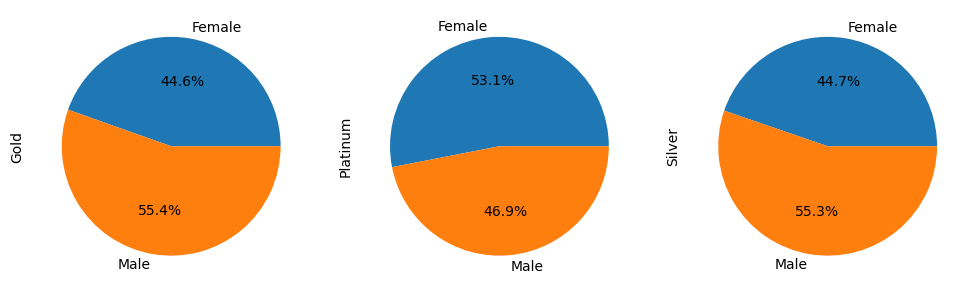

In [30]:
gender_segment.T.plot(kind='pie',subplots=True,figsize=(12,6),autopct='%1.1f%%',legend=False)

In [31]:
# 12. Among males and females, which gender had claimed the most for any type of driver related issues

driver_gender = insurance.loc[insurance.incident_cause.str.lower().str.contains('driver')].groupby(by=['gender'])[['total_policy_claims']].count()
driver_gender = driver_gender.reset_index()
driver_gender

,gender,total_policy_claims
0,Female,221
1,Male,280


Text(0.5, 1.0, 'gender claiming driver related issues')

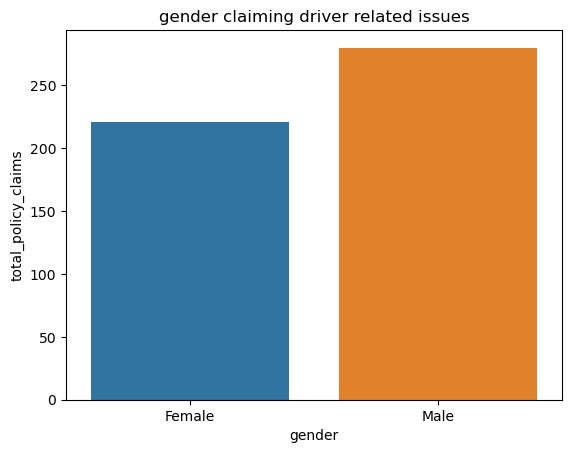

In [32]:
sns.barplot(data = driver_gender, y='total_policy_claims', x='gender')
plt.title('gender claiming driver related issues')

In [33]:
# 13. Which age group had the maximum fraudulent policy claims?

maxx = insurance.groupby('Age_group')[['fraudulent']].count().reset_index().sort_values(by='fraudulent',ascending=False)

print('Adults have claimed maximum fraudulent policy\n')

print(maxx)

Adults have claimed maximum fraudulent policy

  Age_group  fraudulent
0     Adult         744
2     Youth         326
1  Children           8


Text(0.5, 1.0, 'age group had the maximum fraudulent policy claims')

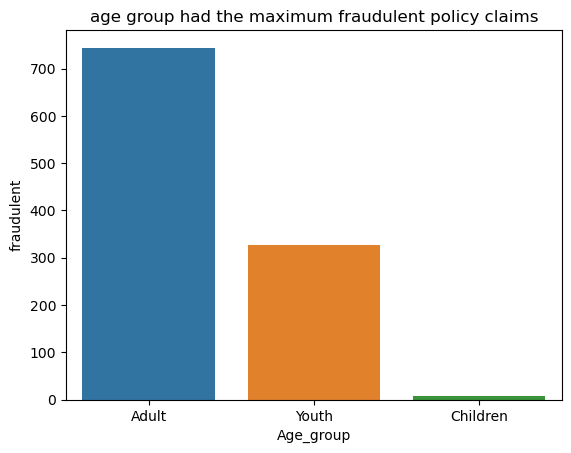

In [34]:
sns.barplot(data=maxx, y='fraudulent', x='Age_group')
plt.title('age group had the maximum fraudulent policy claims')

In [35]:
# 14. Visualize the monthly trend of the total amount that has been claimed
# by the customers. Ensure that on the “month” axis, the month is in a
# chronological order not alphabetical order. 

insurance['Month'] = insurance.claim_date.dt.month
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,Unreported,Age,Age_group,Month
0,154557,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,1,39.88,Adult,4
1,263204,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,1,45.29,Adult,4
2,287476,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0,29.22,Youth,10
3,441097,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1,46.59,Adult,3
4,524545,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,1,37.96,Adult,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,1965-01-28,UT,5.175625e+09,Silver,4549014,Other causes,2018-07-07,Auto,Injury only,21480.000000,1.0,No,1,53.44,Adult,7
1074,99723844,Female,1966-06-19,HI,4.577521e+09,Gold,35453672,Natural causes,2018-01-06,Auto,Material and injury,14360.000000,1.0,No,1,51.55,Adult,1
1075,99761663,Female,1963-11-18,NC,6.432465e+09,Silver,37305754,Natural causes,2018-04-04,Auto,Material only,1242.000000,1.0,Yes,1,54.38,Adult,4
1076,99892000,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,Driver error,2017-11-13,Auto,Material only,2415.000000,2.0,Yes,1,22.43,Youth,11


<AxesSubplot:title={'center':'monthly trend of the total amount'}, xlabel='Month', ylabel='claim_amount'>

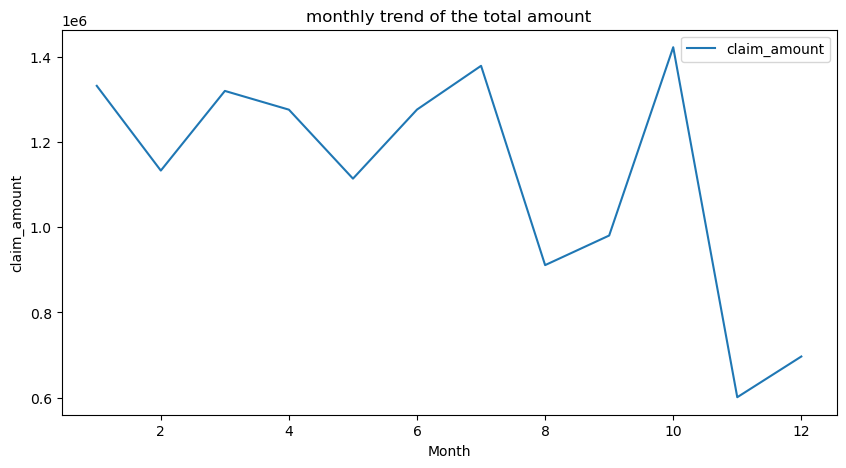

In [36]:
monthly_trend = round((insurance.groupby('Month')[['claim_amount']].sum()),3)
monthly_trend.plot(kind='line',figsize=(10,5), ylabel='claim_amount',title='monthly trend of the total amount')

array([<AxesSubplot:title={'center':'(claim_amount, Adult)'}, xlabel='gender', ylabel='claim_amount'>,
       <AxesSubplot:title={'center':'(claim_amount, Children)'}, xlabel='gender', ylabel='claim_amount'>,
       <AxesSubplot:title={'center':'(claim_amount, Youth)'}, xlabel='gender', ylabel='claim_amount'>],
      dtype=object)

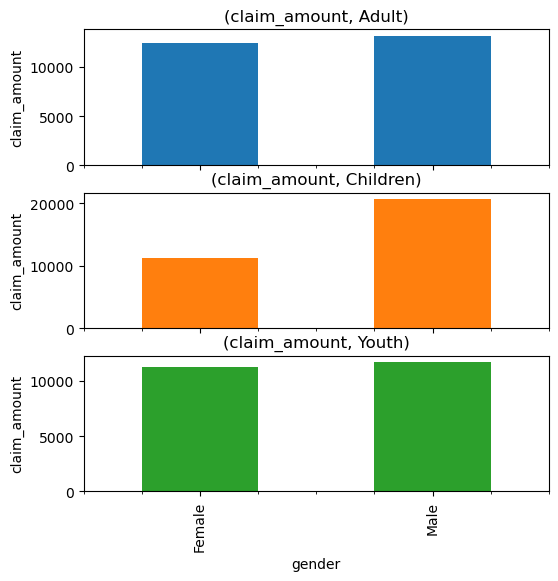

In [37]:
# 15. What is the average claim amount for gender and age categories and
# suitably represent the above using a facetted bar chart, one facet that
# represents fraudulent claims and the other for non-fraudulent claims.

#gender_agee = insurance.pivot_table(columns=['gender'],index=['Age_group'],values='claim_amount',aggfunc=np.sum).reset_index()
gender_agee = insurance.groupby(by=['gender','Age_group'])[['claim_amount']].mean()
gender_agee.unstack(1).plot(kind='bar',xlabel='gender', ylabel= 'claim_amount', subplots=True,legend=False,figsize=(6,6))

In [38]:
pp1 = insurance.loc[insurance.fraudulent == 'Yes'].groupby(['gender','Age_group'])[['fraudulent']].count().reset_index()
pp2 = insurance.loc[insurance.fraudulent == 'No'].groupby(['gender','Age_group'])[['fraudulent']].count().reset_index()


Text(0.5, 0, 'Non - fraudulent claims')

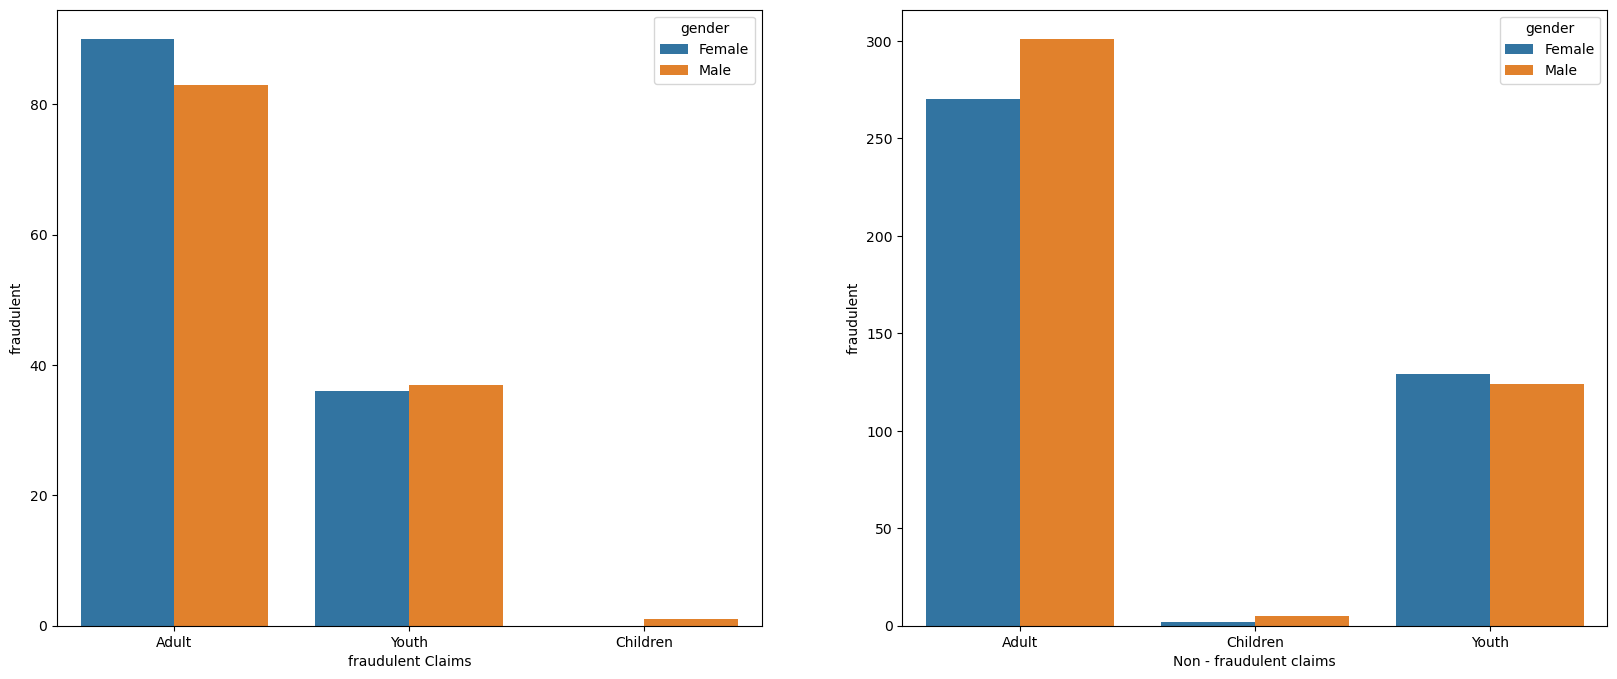

In [39]:
f, axes = plt.subplots(1, 2, figsize=(20, 8))
fraud_yes = sns.barplot(data=pp1,x='Age_group', y='fraudulent',hue='gender',ax=axes[0])
fraud_yes.set_xlabel('fraudulent Claims')



fraud_no = sns.barplot(data=pp2,x='Age_group', y='fraudulent',hue='gender',ax=axes[1])
fraud_no.set_xlabel('Non - fraudulent claims')

# Hypothesis testing

In [40]:
import scipy.stats as stats
import statsmodels.api 

## Q. 16.

In [41]:
M_amount = insurance[insurance.gender == 'Male']['claim_amount']
F_amount = insurance[insurance.gender == 'Female']['claim_amount']

In [42]:
stats.ttest_ind(M_amount, F_amount)

Ttest_indResult(statistic=0.8848703612768547, pvalue=0.3764242430541366)

In [43]:
# p-value > 0.05, therefore we donot reject null hypothesis, at 95% of confidence level

# Business Conclusion :- there is no similarity in the amount claimed by males and females

# Q. 17


In [44]:
cross = pd.crosstab(insurance.Age_group,insurance.Segment)
cross

Segment,Gold,Platinum,Silver
Age_group,,,
Adult,262,241,241
Children,4,4,0
Youth,105,116,105


In [45]:
chi = stats.chi2_contingency(cross)
print(chi,'\n\n','p-value =',chi[1])

(5.098596131097103, 0.2773297050612434, 4, array([[256.05194805, 249.15027829, 238.79777365],
       [  2.75324675,   2.67903525,   2.567718  ],
       [112.19480519, 109.17068646, 104.63450835]])) 

 p-value = 0.2773297050612434


In [46]:
# p-value > 0.05, therefore we donot reject null hypothesis, at 95% confidence level

# Business conclusion :- There is no relationship between age_group and segment

# Q. 18.

In [56]:
insurance['Year'] = insurance.claim_date.apply(lambda x: x.year)

In [61]:
current_year = insurance.loc[insurance.Year == 2018]['claim_amount']

In [62]:
stats.ttest_1samp(current_year, popmean=10000)

Ttest_1sampResult(statistic=4.371256632390438, pvalue=1.5155175751799137e-05)

In [ ]:
# At 95% confidence level, p-value > 0.05 \n Therefore, we donot reject null hypothesis

# Business conclusion :- claim amount is not increased in the current year compared to 2016-17

# Q. 19.

In [47]:
print(insurance['Age_group'].value_counts())
a1=insurance[insurance['Age_group']=='Adult']['claim_amount']
a2=insurance[insurance['Age_group']=='Children']['claim_amount']
a3=insurance[insurance['Age_group']=='Youth']['claim_amount']
a4=insurance[insurance['Age_group']=='Adult']['claim_amount']

Adult       744
Youth       326
Children      8
Name: Age_group, dtype: int64


In [48]:
stats.f_oneway(a1,a2,a3,a4)

F_onewayResult(statistic=1.3754671743703646, pvalue=0.2484995634856271)

In [49]:
# At 95% confidence level, p-value > 0.05 \n Therefore, we donot reject null hypothesis

# Business conclusion :- There is no relationship between age groups and insurance claims

# Q. 20.

In [54]:
stats.pearsonr(insurance.total_policy_claims, insurance.claim_amount)

PearsonRResult(statistic=-0.014291136186627362, pvalue=0.6392846937920396)

In [ ]:
# At 95% confidence level p-value > 0.05 , Hence we donot reject null hypothesis

# Business conclusion :- There is no relatioship between total no. of policy claims and claimed amount.